In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
mf = pd.read_json('/content/ODI.json')

In [ ]:
mf.shape

(2500, 15)

In [ ]:
mf.to_csv (r'/content/sample_data/ODI.csv', index = None)

In [ ]:
! python -m pip install pymongo==3.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymongo: filename=pymongo-3.7.2-cp39-cp39-linux_x86_64.whl size=427364 sha256=7929fc8cec3daff8d1e167aa0e850c6be757dc80d82072653ff41568e023e61d
  Stored in directory: /root/.cache/pip/wheels/f5/09/ef/63aed9051effc647dde06bf22a2ff0c8537a0bdae2dde72121
Successfully built pymongo


In [ ]:
import datetime
import pymongo
from pymongo import MongoClient

# uri (uniform resource identifier) defines the connection parameters 
uri = '/content/sample_data/ODI.csv'
# start client to connect to MongoDB server 
client = MongoClient( uri )

In [ ]:
client.stats  

Database(MongoClient(host=['/content/sample_data/odi.csv:27017'], document_class=dict, tz_aware=False, connect=True), 'stats')

In [ ]:
df = pd.read_csv('/content/ODI data.csv')

In [ ]:
df.info

<bound method DataFrame.info of       Unnamed: 0                       Player       Span  Mat Inns  NO   Runs  \
0              0         SR Tendulkar (INDIA)  1989-2012  463  452  41  18426   
1              1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   
2              2         RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   
3              3      ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   
4              4   DPMD Jayawardene (Asia/SL)  1998-2015  448  418  39  12650   
...          ...                          ...        ...  ...  ...  ..    ...   
2495          45              ZS Ansari (ENG)  2015-2015    1    -   -      -   
2496          46         Ariful Haque (BDESH)  2018-2018    1    -   -      -   
2497          47           Ashfaq Ahmed (PAK)  1994-1994    3    -   -      -   
2498          48               MD Bailey (NZ)  1998-1998    1    -   -      -   
2499          49               GR Beard (AUS)  1981-1981    2    -   -      -

In [ ]:
df.shape

(2500, 15)

In [ ]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN


In [ ]:
df.describe()

,Unnamed: 0,Mat,Unnamed: 13
count,2500.000000,2500.000000,0.0
mean,24.500000,37.161600,NaN
std,14.433757,58.885075,NaN
min,0.000000,1.000000,NaN
25%,12.000000,4.000000,NaN
50%,24.500000,13.000000,NaN
75%,37.000000,43.000000,NaN
max,49.000000,463.000000,NaN


In [ ]:
df.columns[df.isnull().any()], df.isnull().sum()

(Index(['Unnamed: 13'], dtype='object'),
 Unnamed: 0        0
 Player            0
 Span              0
 Mat               0
 Inns              0
 NO                0
 Runs              0
 HS                0
 Ave               0
 BF                0
 SR                0
 100               0
 50                0
 0                 0
 Unnamed: 13    2500
 dtype: int64)

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 13'], axis=1)

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
df[['Player', 'Region']] = df['Player'].str.split("(", n=1, expand=True)

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA)
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL)
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS/ICC)
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,Asia/SL)
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,Asia/SL)


In [ ]:
df['Region'] = df['Region'].map(lambda x: x.rstrip(')'))
df.head(5)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL


In [ ]:
df[['Start', 'End']] = df['Span'].str.split("-", n=1, expand=True)


In [ ]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start,End
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,INDIA,1989,2012
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,Asia/ICC/SL,2000,2015
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS/ICC,1995,2012
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,Asia/SL,1989,2011
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,Asia/SL,1998,2015
5,Inzamam-ul-Haq,1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,Asia/PAK,1991,2007
6,V Kohli,2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,INDIA,2008,2019
7,JH Kallis,1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,Afr/ICC/SA,1996,2014
8,SC Ganguly,1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,Asia/INDIA,1992,2007
9,R Dravid,1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,Asia/ICC/INDIA,1996,2011


In [ ]:
df[['Region1', 'Region']] = df['Region'].str.split("/", n=1, expand=True)
df.head(7)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start,End,Region1
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,ICC/SL,2000,2015,Asia
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,ICC,1995,2012,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,SL,1989,2011,Asia
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,SL,1998,2015,Asia
5,Inzamam-ul-Haq,1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,PAK,1991,2007,Asia
6,V Kohli,2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,None,2008,2019,INDIA


In [ ]:
#splitting region1 column into region2
df[['Region2', 'Region']] = df['Region'].str.split("/", n=1, expand=True)
df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start,End,Region1,Region2
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA,None
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,SL,2000,2015,Asia,ICC


In [ ]:
#unique values in region1 
print("Region1 unique values are: ", df.Region1.unique()) 
print("Region2 unique values are: ", df.Region2.unique())
print("Region unique values are: ", df.Region.unique())

Region1 unique values are:  ['INDIA' 'Asia' 'AUS' 'Afr' 'ICC' 'SL' 'PAK' 'WI' 'NZ' 'SA' 'ENG' 'BDESH'
 'ZIM' 'IRE' 'AFG' 'SCOT' 'KENYA' 'CAN' 'NL' 'UAE' 'HKG' 'BMUDA' 'PNG'
 'USA' 'NAM' 'NEPAL' 'OMAN' '3) (PAK' 'EAf' '1) (UAE']
Region2 unique values are:  [None 'ICC' 'SL' 'PAK' 'INDIA' 'WI' 'SA' 'NZ' 'IRE' 'ZIM' 'BDESH' 'KENYA'
 'PNG' 'SCOT' 'USA']
Region unique values are:  [None 'SL' 'SA' 'INDIA' 'PAK']


In [ ]:
def new_co(df):
    if df['Region1'] is not None:
        if df['Region1'].isupper():
            if (df.Region1=='ICC'):
                return df['Region2']
            else:
                return df['Region1']
                
        elif df['Region'] is not None:
            if df['Region'].isupper():
                if df['Region'] is not "ICC":
                    return df['Region']
            else:
                return df['Region2']
        else:
                return df['Region2']
    else:
        return "NA"

<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-43-10217a46f40a>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if df['Region'] is not "ICC":


In [ ]:
df['Final Region'] = df.apply(new_co, axis=1)


In [ ]:
df.head(7)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Region,Start,End,Region1,Region2,Final Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,None,1989,2012,INDIA,None,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,SL,2000,2015,Asia,ICC,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,None,1995,2012,AUS,ICC,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,None,1989,2011,Asia,SL,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,None,1998,2015,Asia,SL,SL
5,Inzamam-ul-Haq,1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,None,1991,2007,Asia,PAK,PAK
6,V Kohli,2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,None,2008,2019,INDIA,None,INDIA


In [ ]:
df["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', '3) (PAK', None,
       '1) (UAE'], dtype=object)

In [ ]:
#checking null records in final region
print(df["Final Region"].isnull().sum())

13


In [ ]:
df = df.drop(["Region1", "Region2", "Region"], axis=1)
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Final Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,1989,2011,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,SL


In [ ]:
#checking unique records in final region
df["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', '3) (PAK', None,
       '1) (UAE'], dtype=object)

In [ ]:
df = df.drop([2148, 949])
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Final Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,INDIA
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,1989,2011,SL
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS Ansari,2015-2015,1,-,-,-,-,-,-,-,-,-,-,2015,2015,ENG
2496,Ariful Haque,2018-2018,1,-,-,-,-,-,-,-,-,-,-,2018,2018,BDESH
2497,Ashfaq Ahmed,1994-1994,3,-,-,-,-,-,-,-,-,-,-,1994,1994,PAK
2498,MD Bailey,1998-1998,1,-,-,-,-,-,-,-,-,-,-,1998,1998,NZ


In [ ]:
df["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN', None], dtype=object)

In [ ]:
df=df[df['Final Region'].isnull()==False]

In [ ]:
df["Final Region"].unique()

array(['INDIA', 'SL', 'AUS', 'PAK', 'SA', 'WI', 'NZ', 'ENG', 'BDESH',
       'ZIM', 'IRE', 'KENYA', 'AFG', 'SCOT', 'CAN', 'NL', 'UAE', 'HKG',
       'BMUDA', 'PNG', 'USA', 'NAM', 'NEPAL', 'OMAN'], dtype=object)

In [ ]:
#checking null values in the final region

df[df["Final Region"].isnull()]
df.isna().sum()

Player          0
Span            0
Mat             0
Inns            0
NO              0
Runs            0
HS              0
Ave             0
BF              0
SR              0
100             0
50              0
0               0
Start           0
End             0
Final Region    0
dtype: int64

In [ ]:
df["HS"] = df["HS"].str.replace('*', '')
df.tail(55)

<ipython-input-58-0101fb73cf93>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["HS"] = df["HS"].str.replace('*', '')
<ipython-input-58-0101fb73cf93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HS"] = df["HS"].str.replace('*', '')


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Final Region
2445,Harunur Rashid,1988-1988,2,2,0,0,0,0.00,17,0.00,0,0,2,1988,1988,BDESH
2446,SM Harwood,2009-2009,1,1,0,0,0,0.00,4,0.00,0,0,1,2009,2009,AUS
2447,Ishtiaq Muhammad,2016-2016,1,1,1,0,0,-,0,-,0,0,0,2016,2016,HKG
2448,Kaleemullah,2019-2019,3,1,0,0,0,0.00,2,0.00,0,0,1,2019,2019,OMAN
2449,PHT Kaushal,2015-2015,1,1,0,0,0,0.00,1,0.00,0,0,1,2015,2015,SL
2450,GJP Kruger,2006-2006,3,2,1,0,0,0.00,10,0.00,0,0,1,2006,2006,SA
2451,AGR Loudon,2006-2006,1,1,0,0,0,0.00,0,-,0,0,1,2006,2006,ENG
2452,OC McCoy,2018-2018,2,1,1,0,0,-,1,0.00,0,0,0,2018,2018,WI
2453,AW Mathieson,2015-2015,1,1,1,0,0,-,0,-,0,0,0,2015,2015,NZ
2454,KP Meiyappan,2019-2019,2,1,0,0,0,0.00,1,0.00,0,0,1,2019,2019,UAE


In [ ]:
df.replace('-', 0, inplace=True)
df.tail(20)

<ipython-input-59-cd3f2468f4c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-', 0, inplace=True)


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Final Region
2480,Shadab Kabir,1996-1996,3,3,0,0,0,0.00,5,0.00,0,0,3,1996,1996,PAK
2481,Shakeel Khan,1987-1987,1,1,0,0,0,0.00,4,0.00,0,0,1,1987,1987,PAK
2482,T Shamsi,2016-2019,17,3,2,0,0,0.00,2,0.00,0,0,1,2016,2019,SA
2483,Simandeep Singh,2018-2018,1,1,0,0,0,0.00,7,0.00,0,0,1,2018,2018,HKG
2484,GS Sobers,1973-1973,1,1,0,0,0,0.00,6,0.00,0,0,1,1973,1973,WI
2485,Tanvir Mehdi,1992-1992,1,1,0,0,0,0.00,5,0.00,0,0,1,1992,1992,PAK
2486,M Venkataramana,1988-1988,1,1,1,0,0,0,0,0,0,0,0,1988,1988,INDIA
2487,R Walters,2003-2003,2,2,0,0,0,0.00,5,0.00,0,0,2,2003,2003,NAM
2488,CM Willoughby,2000-2003,3,2,0,0,0,0.00,4,0.00,0,0,2,2000,2003,SA
2489,Zakir Hossain,1998-1998,1,1,0,0,0,0.00,1,0.00,0,0,1,1998,1998,BDESH


In [ ]:
df.info

<bound method DataFrame.info of                  Player       Span  Mat Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar   1989-2012  463  452  41  18426  200  44.83  21367   
1        KC Sangakkara   2000-2015  404  380  41  14234  169  41.98  18048   
2           RT Ponting   1995-2012  375  365  39  13704  164  42.03  17046   
3        ST Jayasuriya   1989-2011  445  433  18  13430  189  32.36  14725   
4     DPMD Jayawardene   1998-2015  448  418  39  12650  144  33.37  16020   
...                 ...        ...  ...  ...  ..    ...  ...    ...    ...   
2495         ZS Ansari   2015-2015    1    0   0      0    0      0      0   
2496      Ariful Haque   2018-2018    1    0   0      0    0      0      0   
2497      Ashfaq Ahmed   1994-1994    3    0   0      0    0      0      0   
2498         MD Bailey   1998-1998    1    0   0      0    0      0      0   
2499          GR Beard   1981-1981    2    0   0      0    0      0      0   

         SR 100  50   0 Start  

In [ ]:
df[['Runs', 'Ave', 'HS', 'SR']] = df[['Runs', 'Ave', 'HS', 'SR']].astype('float')

<ipython-input-61-2d2c4ad341c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Runs', 'Ave', 'HS', 'SR']] = df[['Runs', 'Ave', 'HS', 'SR']].astype('float')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2485 non-null   object 
 1   Span          2485 non-null   object 
 2   Mat           2485 non-null   int64  
 3   Inns          2485 non-null   object 
 4   NO            2485 non-null   object 
 5   Runs          2485 non-null   float64
 6   HS            2485 non-null   float64
 7   Ave           2485 non-null   float64
 8   BF            2485 non-null   object 
 9   SR            2485 non-null   float64
 10  100           2485 non-null   object 
 11  50            2485 non-null   object 
 12  0             2485 non-null   object 
 13  Start         2485 non-null   object 
 14  End           2485 non-null   object 
 15  Final Region  2485 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 330.0+ KB


In [ ]:
df.groupby('Final Region').mean().sort_values('Mat').tail(10)

<ipython-input-64-449a5b1acc86>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Final Region').mean().sort_values('Mat').tail(10)


,Mat,Runs,HS,Ave,SR
Final Region,,,,,
ENG,33.781377,629.663968,50.728745,19.113441,65.108016
KENYA,34.857143,534.224490,50.142857,15.321020,56.615714
ZIM,42.610294,724.213235,52.669118,15.626324,60.283750
NZ,44.365079,784.460317,51.714286,17.671905,65.346720
PAK,46.621005,863.356164,49.292237,19.012055,63.910685
WI,46.752632,826.942105,54.473684,18.404789,64.853947
AUS,47.972603,928.497717,54.132420,19.835890,68.816164
INDIA,49.829493,943.391705,49.525346,16.978341,66.879263
SL,50.697297,908.454054,46.205405,16.147297,63.090270


<BarContainer object of 2485 artists>

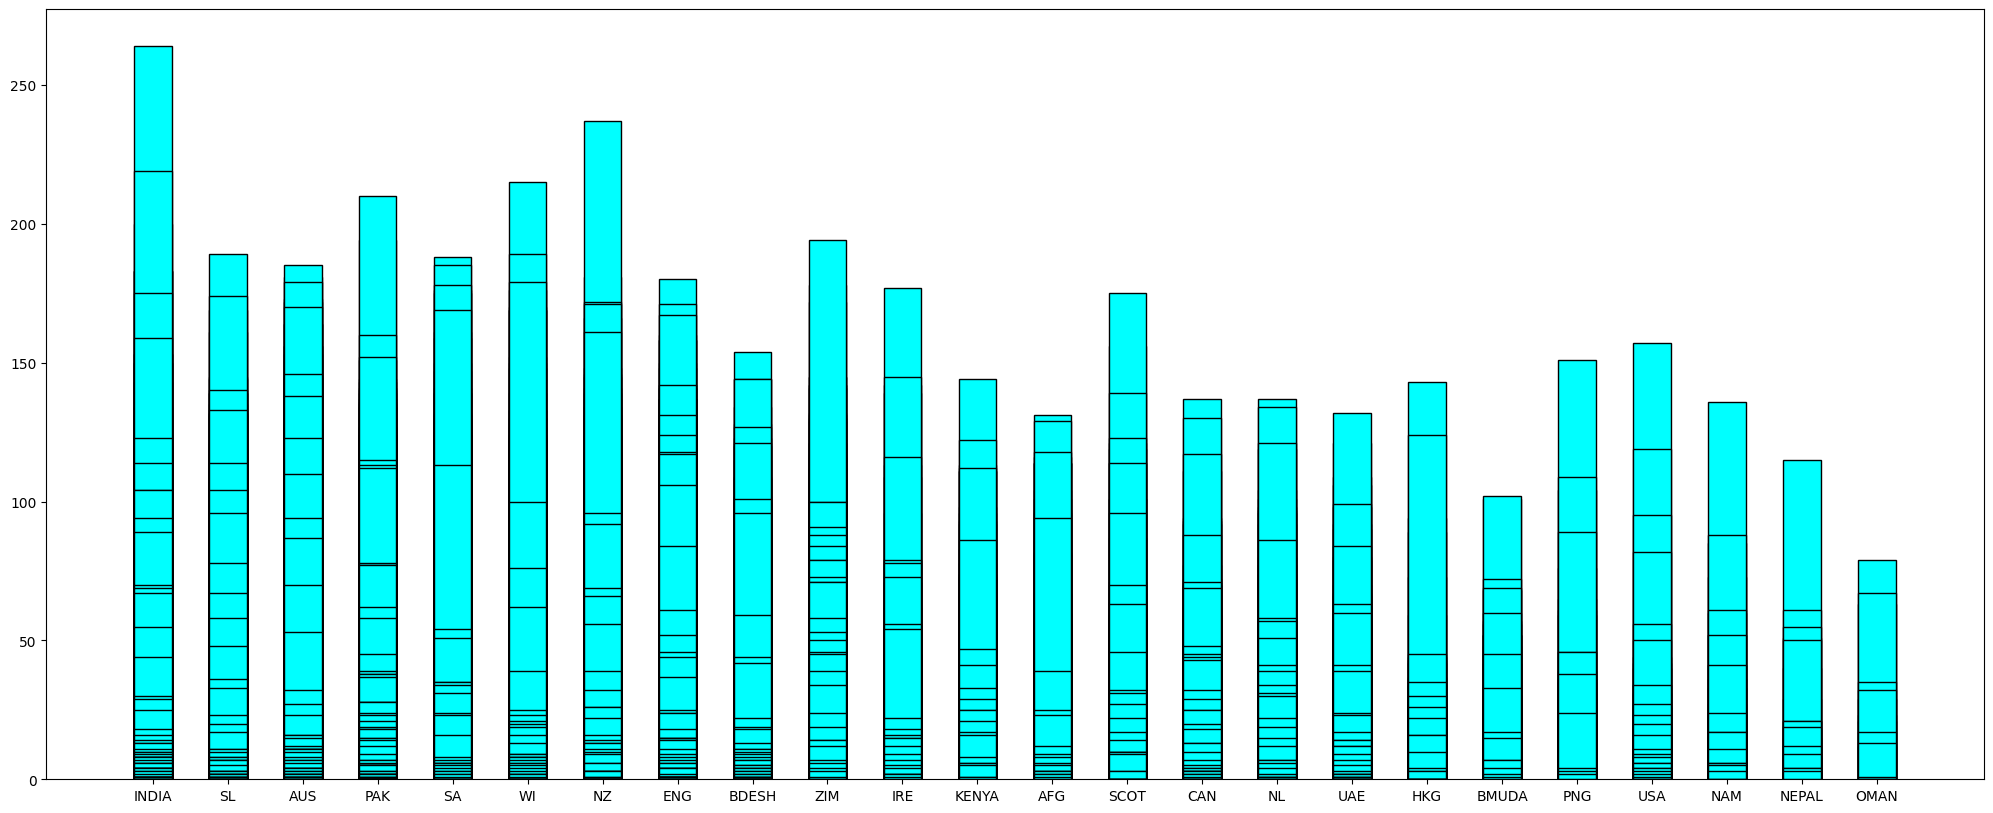

In [ ]:
#Visualization of data
plt.figure(figsize=(25,10))
plt.bar(df['Final Region'], df['HS'], color='cyan', width=0.5, edgecolor='black')

<Figure size 3000x500 with 0 Axes>

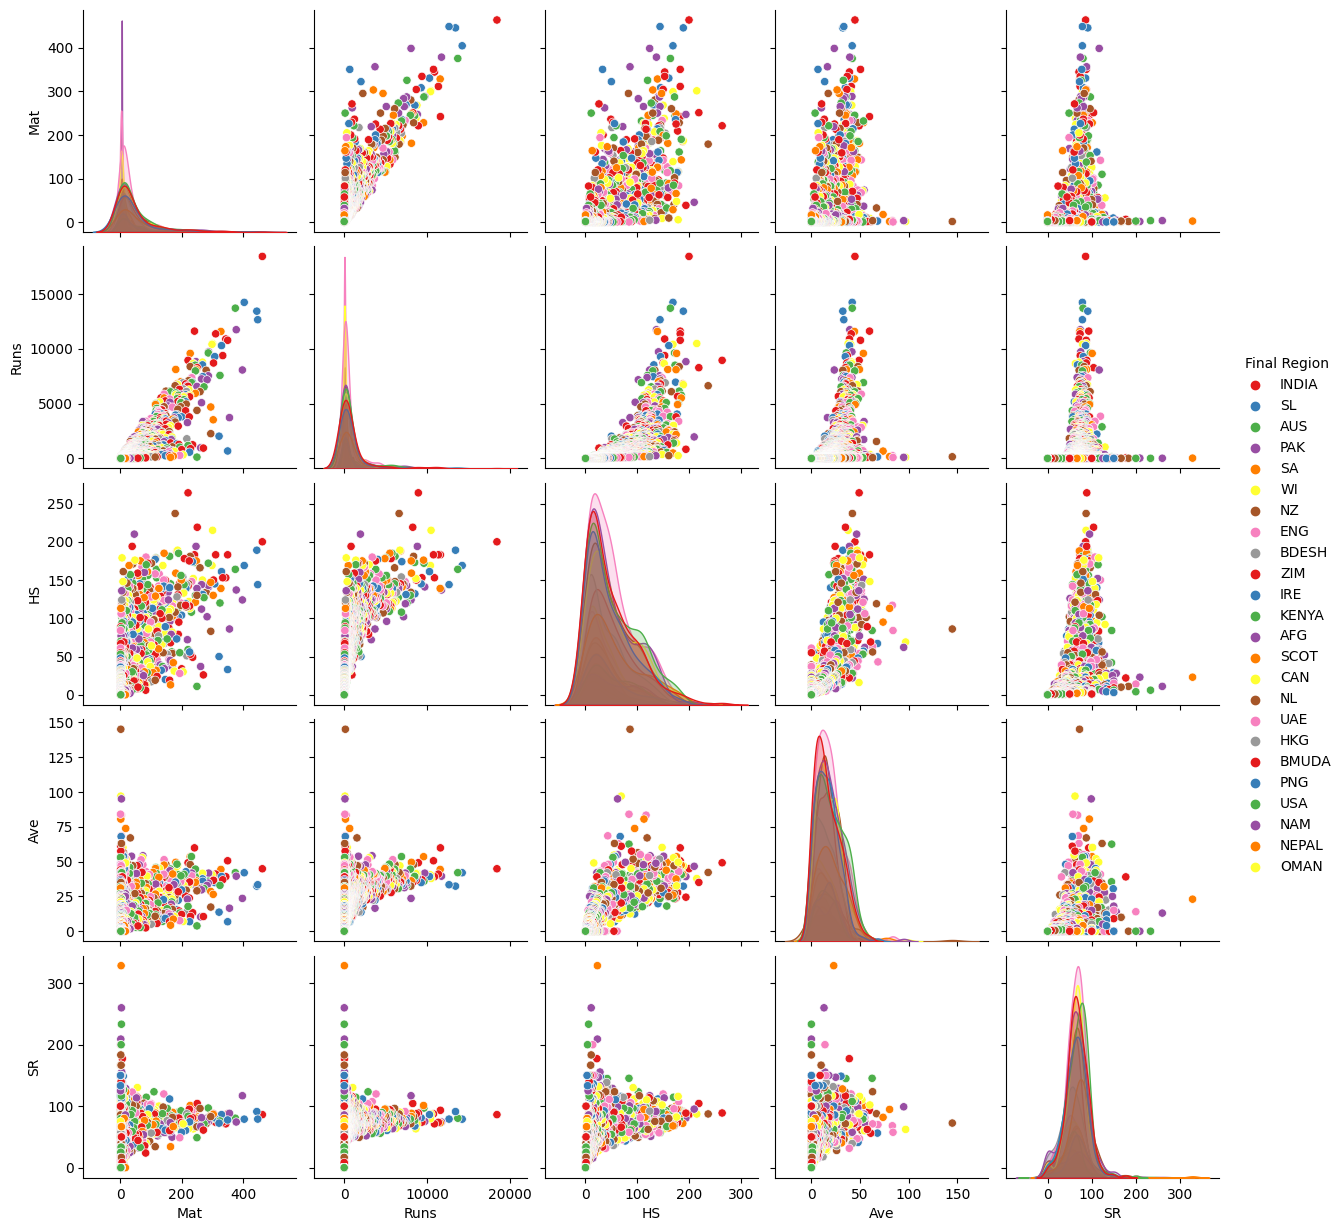

In [ ]:
plt.figure(figsize=(30,5))
sns.pairplot(df, hue='Final Region', palette='Set1')

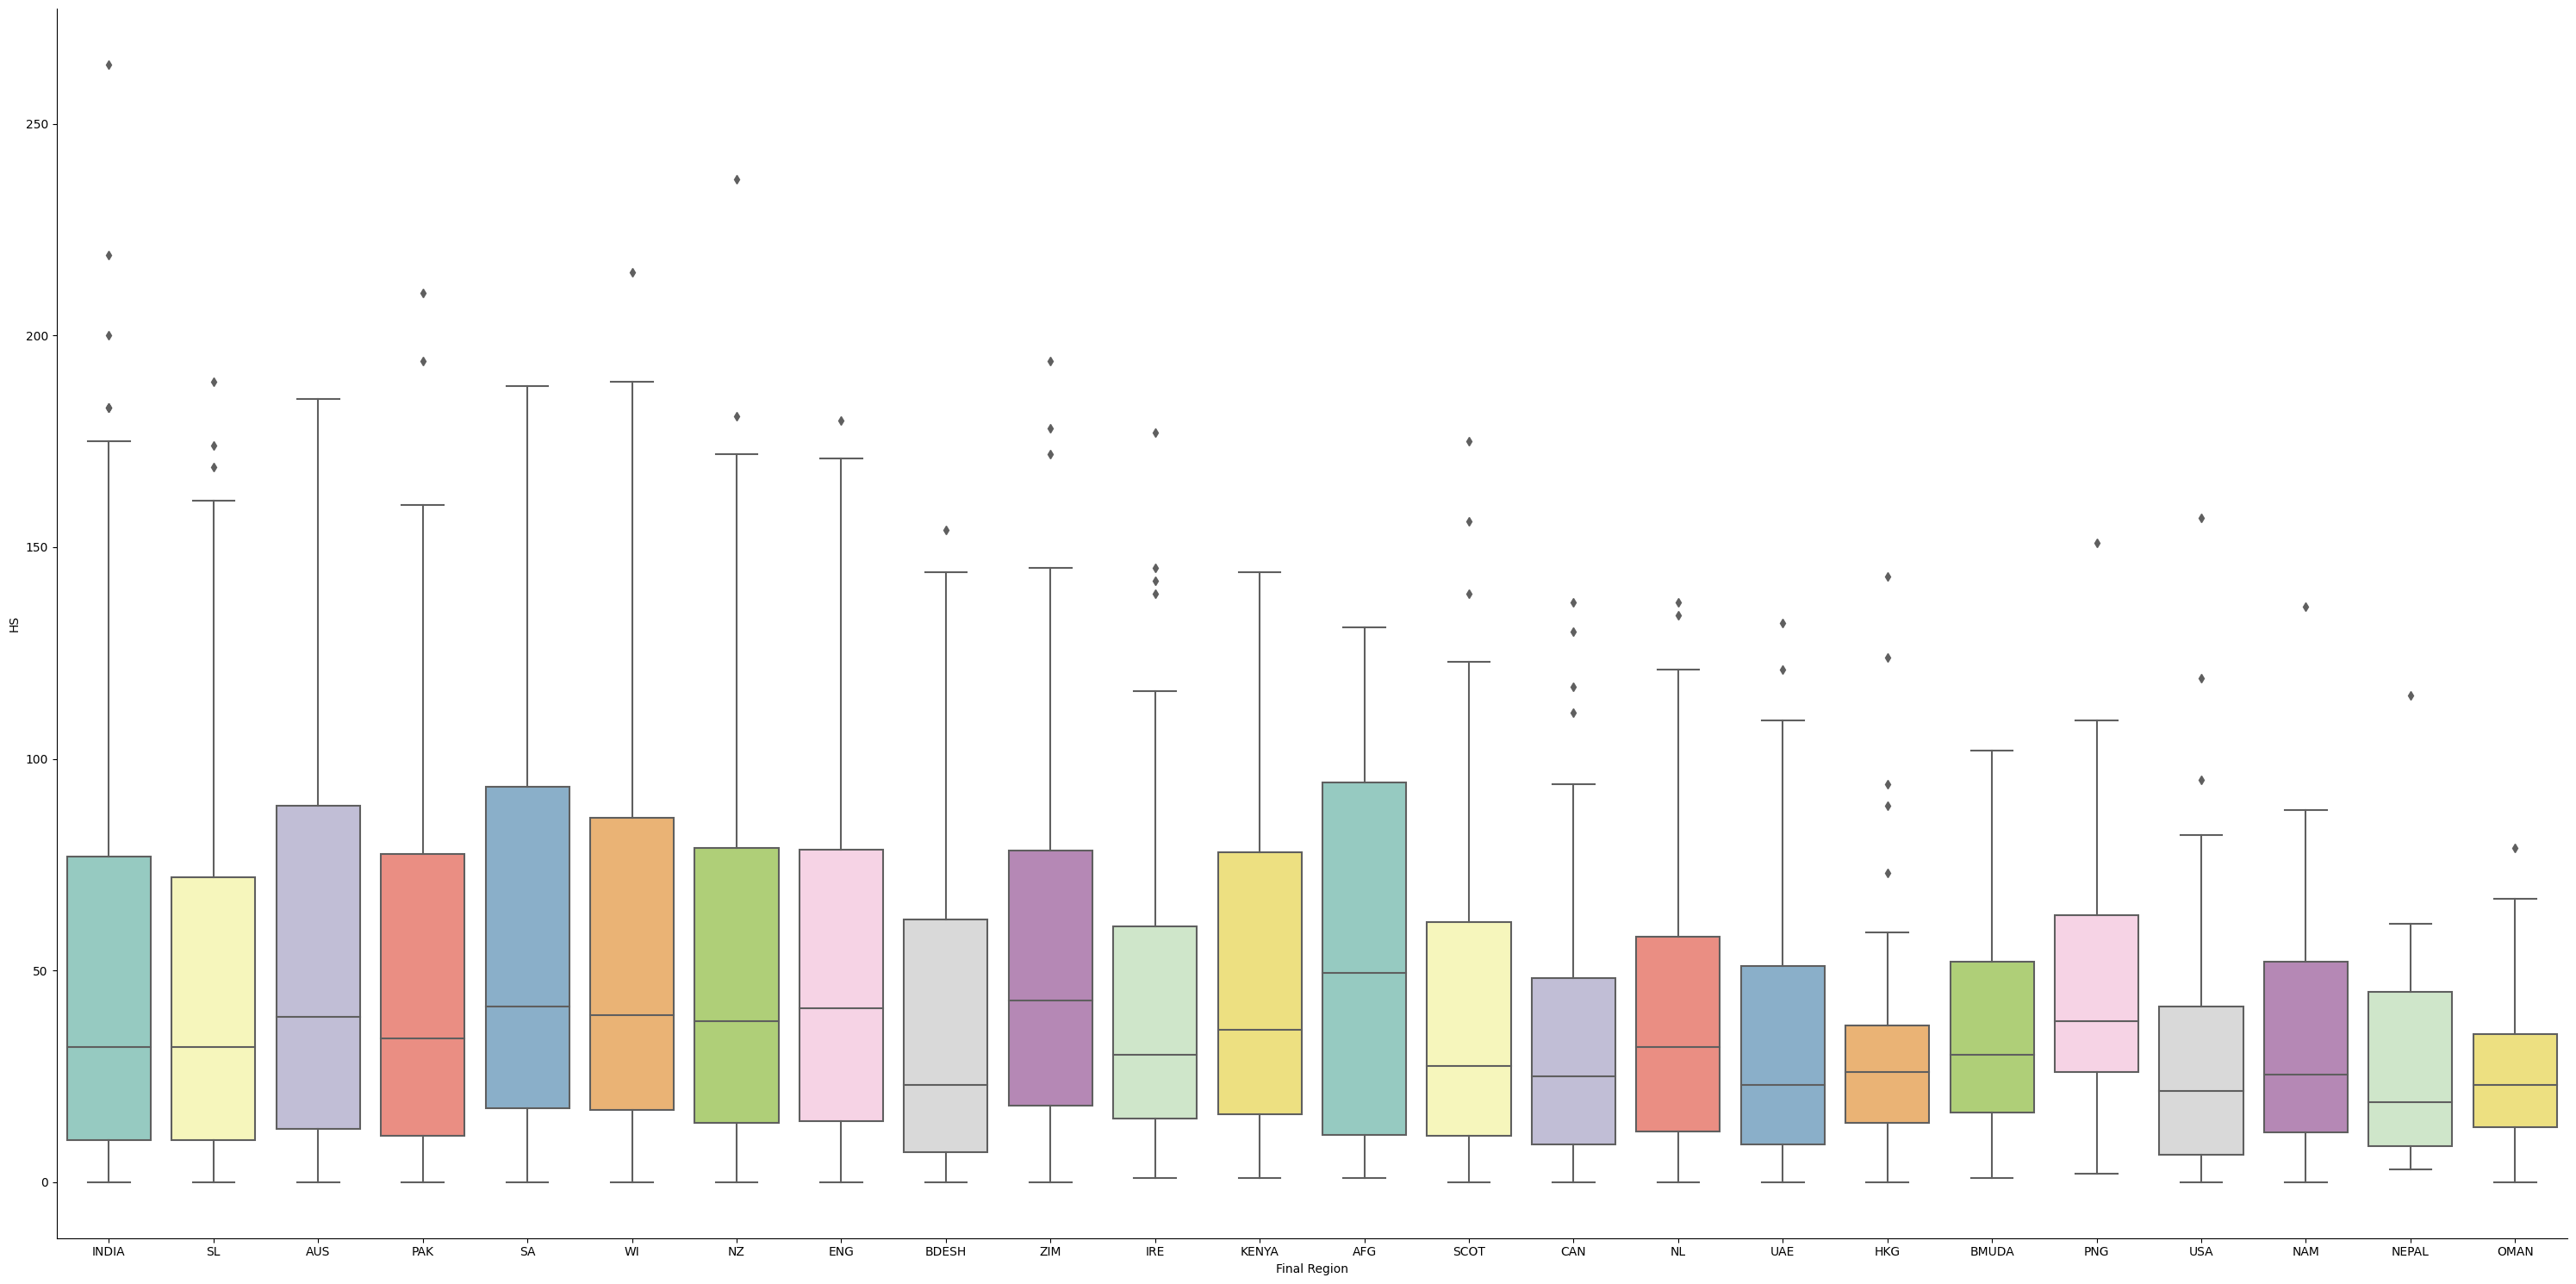

In [ ]:
sns.catplot(x='Final Region', y='HS', data=df, kind='box', palette='Set3', height=15, aspect=2)

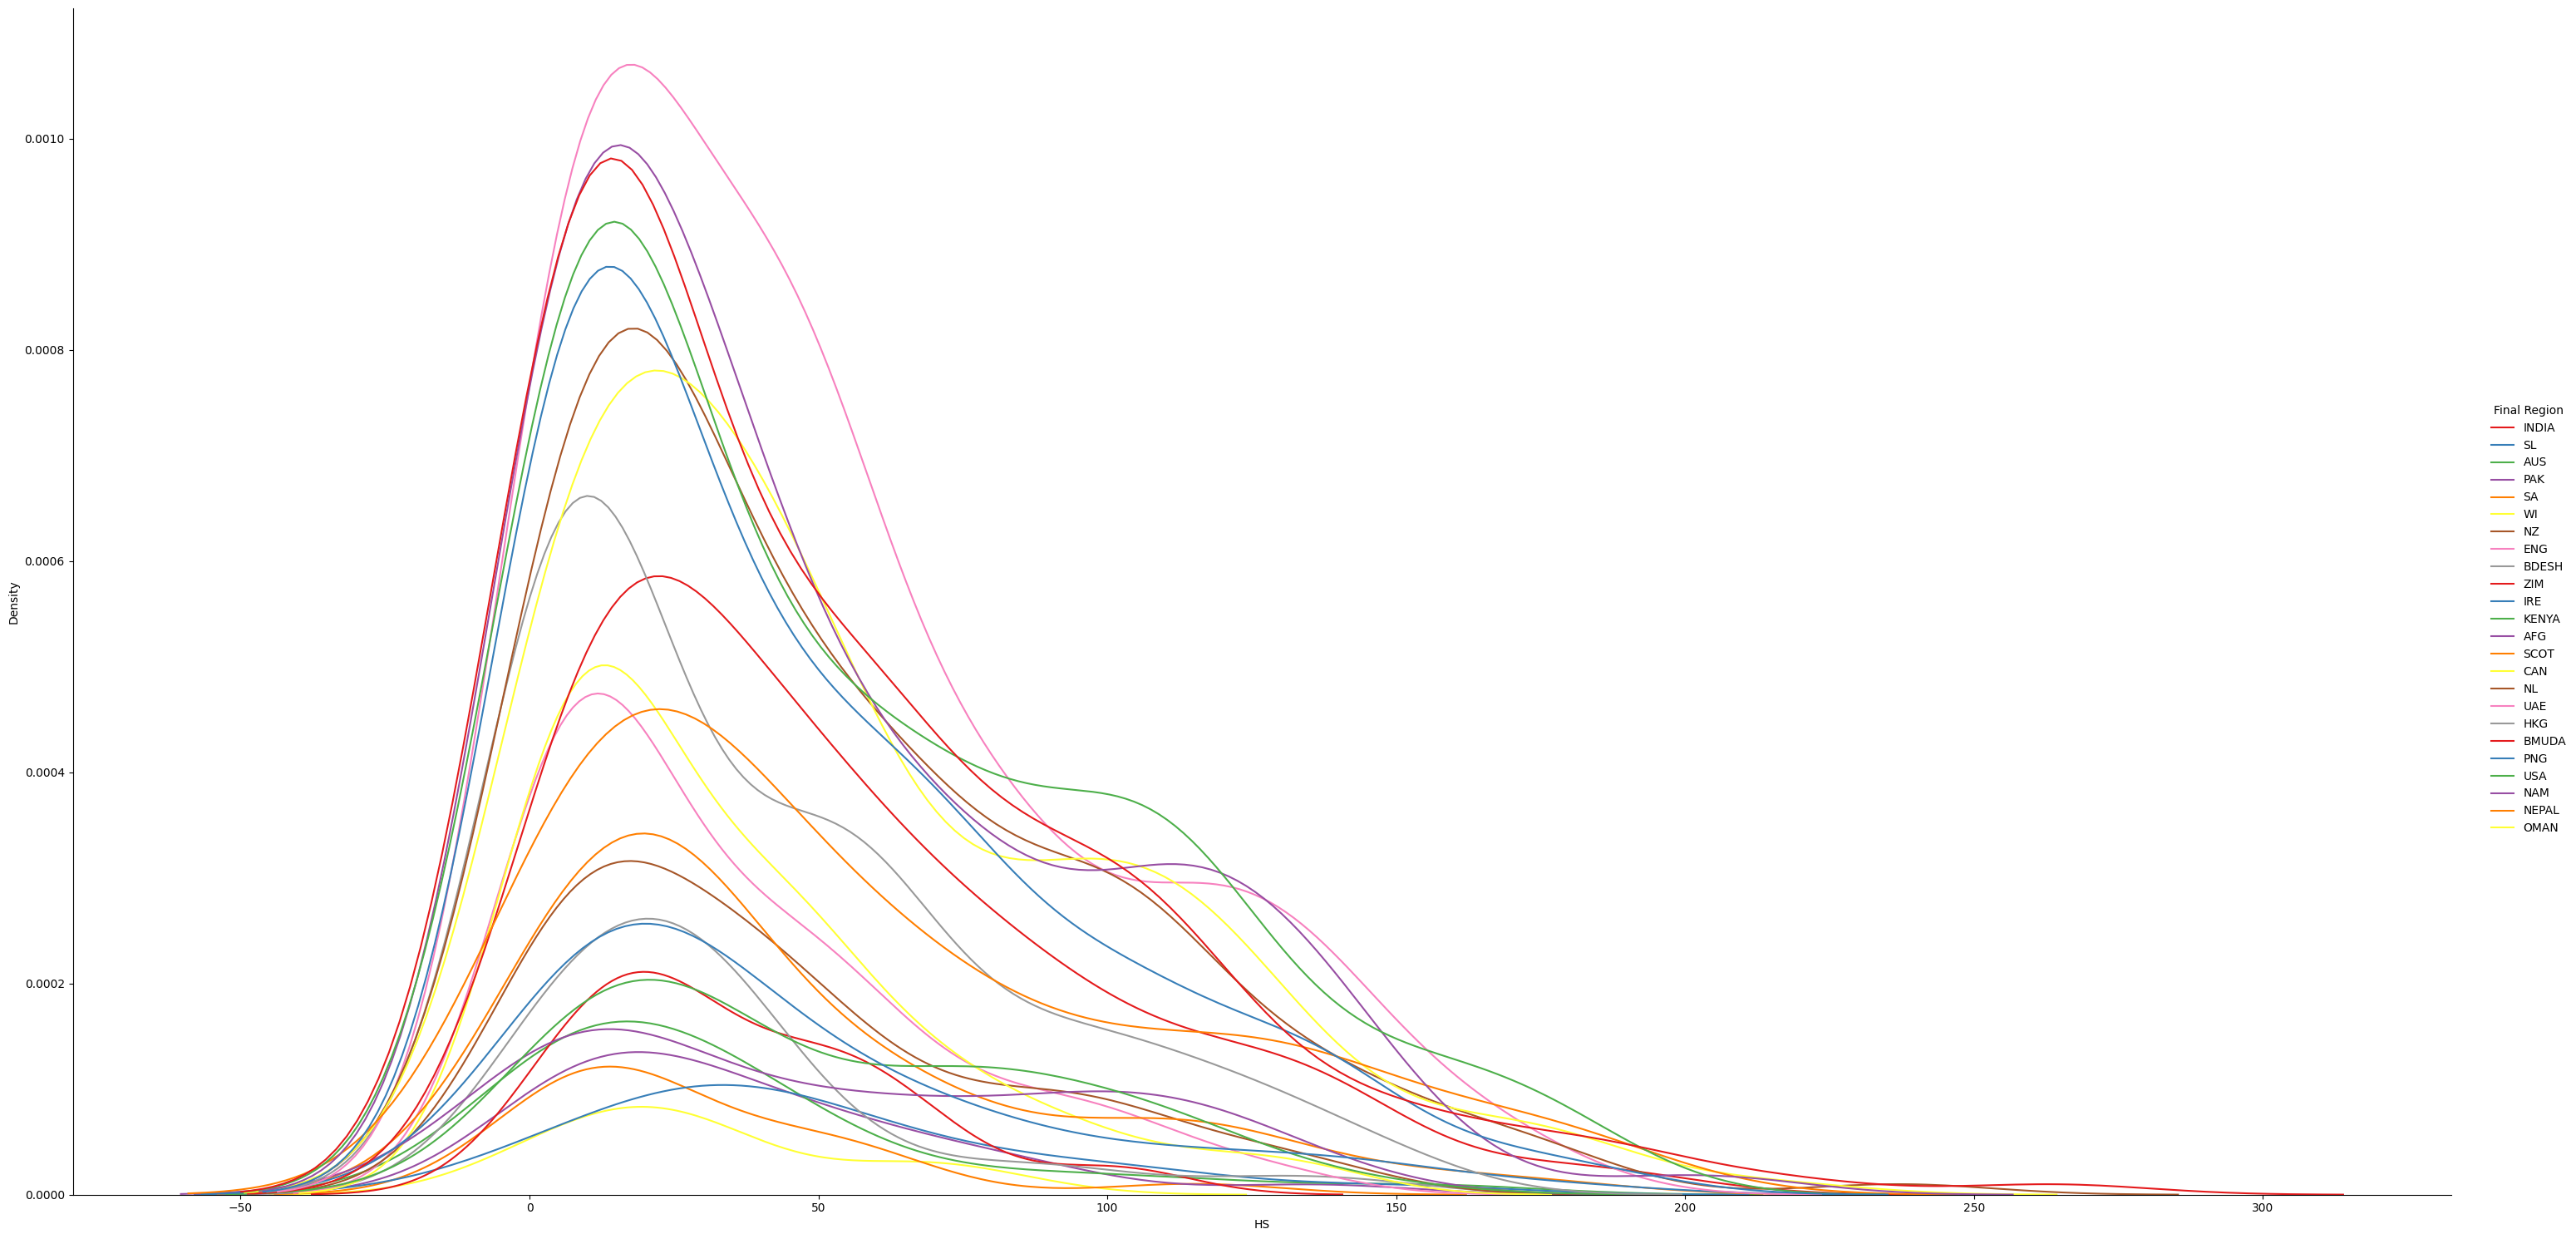

In [ ]:
sns.displot(df, x='HS', hue='Final Region', kind='kde', palette='Set1', height=15, aspect=2)

In [ ]:
import plotly.express as px
px.scatter(df, x="HS", y="Player", animation_frame="End", animation_group="Final Region",size="Runs", color="Final Region", hover_name="Final Region",log_x=False, size_max=160, range_x=[10,250], range_y=[0,90], height=1000)

In [ ]:
import plotly.express as px
px.scatter(df, x="HS", y="Player", animation_frame="Start", animation_group="Final Region",size="Runs", color="Final Region", hover_name="Final Region",log_x=False, size_max=200, range_x=[10,250], range_y=[0,90], height=1000)

In [ ]:
import plotly.express as px
px.scatter(df, x="HS", y="Player", animation_frame="Start", animation_group="Final Region",size="Runs", color="Final Region", hover_name="Final Region",log_x=False, size_max=200, range_x=[10,250], range_y=[0,90], height=1000)

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=44b6eeb1418e734e4138b7c251ff676b6c311098467947

In [2]:
from pandas_profiling import ProfileReport
report = ProfileReport(df, title = 'Pandas Profiling Report', explorative=True)
report

ModuleNotFoundError: No module named 'pandas_profiling'